<a href="https://colab.research.google.com/github/shakebkhan/deeplearning/blob/main/DLNLP_Project_2_035051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Using convolution neural network to detect the image from sample of capcha images

In [ ]:
!pip install tqdm

In [ ]:
!pip install pillow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorboard

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/DLNP Project/"

In [ ]:

import os
import cv2
import string
import numpy as np

print(os.listdir(path + "samples"))

['32dnn.png', '3bfnd.png', '2w4y7.png', '3n3cf.png', '325fb.png', '33p4e.png', '2npg6.png', '42dw4.png', '373gb.png', '3nw7w.png', '3fbxd.png', '3b4we.png', '3x325.png', '3ye2e.png', '2p2y8.png', '42xpy.png', '37ep6.png', '4433m.png', '3wnd3.png', '36w25.png', '2nbc5.jpg', '3p67n.png', '3eny7.png', '36bc2.png', '3ygde.png', '44c22.png', '36nx4.png', '3xng6.png', '33f7m.png', '2ycn8.png', '3pe4g.png', '3ebnn.png', '3n7mx.png', '2wc38.png', '3x5fm.png', '3ym7f.png', '37d52.png', '65m85.png', 'bnc2f.png', 'cfn53.png', 'be3bp.png', 'f75cx.png', 'cy3nw.png', 'b685n.png', '7nnnx.png', 'cewnm.png', '66wp5.png', '6gnm3.png', '58b5m.png', 'e6m6p.png', 'fg7mg (1).png', 'c6745.png', '85pew.jpg', '53wp3.png', 'byfgn.png', 'fg38b (1).png', 'cd4eg.png', 'c4bgd.png', 'fcey3.png', '6g45w.png', '8n34n.png', '5np4m.png', '6ydyp.png', 'c55c6.png', '5dxnm.png', '8y63f.png', 'eppg3.png', '64m82.png', '6ge3p.png', 'en32e.png', 'ewyg7.jpg', '8cccc.png', '4yc85.png', '5nggg.png', 'ddcne.png', '6dmx7.png', 'df

In [ ]:
from PIL import Image
path1="/content/gdrive/MyDrive/DLNP Project/samples/samples/"
img1 = Image.open(path1 + "245y5.png")
img1.show()

In [ ]:
#Initialize main values
symbols = string.ascii_lowercase + "0123456789" # To match the aplhabets and numbers( 26 + 10)
num_symbols = len(symbols)
img_shape = (50, 200, 1)# pixcels


In [ ]:
#To understand how "label" is being made here


In [ ]:
X ,y=0,0 #initializing

In [ ]:
#Preprocessing of image dataset to covert images into array
def preprocess_data():
    n_samples = len(os.listdir("/content/gdrive/MyDrive/DLNP Project/samples/samples"))#counting the number of images in folder  named sample
    X = np.zeros((n_samples, 50, 200, 1)) #1070*50*200
    y = np.zeros((5, n_samples, num_symbols)) #5*1070*36

    for i, pic in enumerate(os.listdir('/content/gdrive/MyDrive/DLNP Project/samples/samples')):
        # Read image as grayscale
        img = cv2.imread(os.path.join('/content/gdrive/MyDrive/DLNP Project/samples/samples', pic), cv2.IMREAD_GRAYSCALE)
        pic_target = pic[:-4]
        if len(pic_target) < 6:
          # Scale and reshape image
            img = img / 255.0
            img = np.reshape(img, (50, 200, 1))
            # Define targets and code them using OneHotEncoding
            targs = np.zeros((5, num_symbols))
            for j, l in enumerate(pic_target):
                ind = symbols.find(l)
                targs[j, ind] = 1
            X[i] = img
            y[:, i] = targs

    # Return final data
    print(X.shape,y.shape) # to know size of input &  output
    return X, y


In [ ]:
X, y = preprocess_data ()
X_train, y_train = X[:970,:,:,:], y[:,:970,:]
X_test, y_test = X[970:,:,:,:], y[:,970:,:]

(1080, 50, 200, 1) (5, 1080, 36)


In [ ]:
def create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    conv1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    conv2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    conv3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7

    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(256, activation='relu')(flat)
        drop = layers.Dropout(0.50)(dens1)
        res = layers.Dense(num_symbols, activation='softmax')(drop)

        outs.append(res)
     # Compile model and return it
    model = Model(img, outs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model


In [ ]:
model = create_model()
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_21 (Conv2D)             (None, 50, 200, 32)  320         ['input_8[0][0]']                
                                                                                                  
 max_pooling2d_21 (MaxPooling2D  (None, 25, 100, 32)  0          ['conv2d_21[0][0]']              
 )                                                                                                
                                                                                            

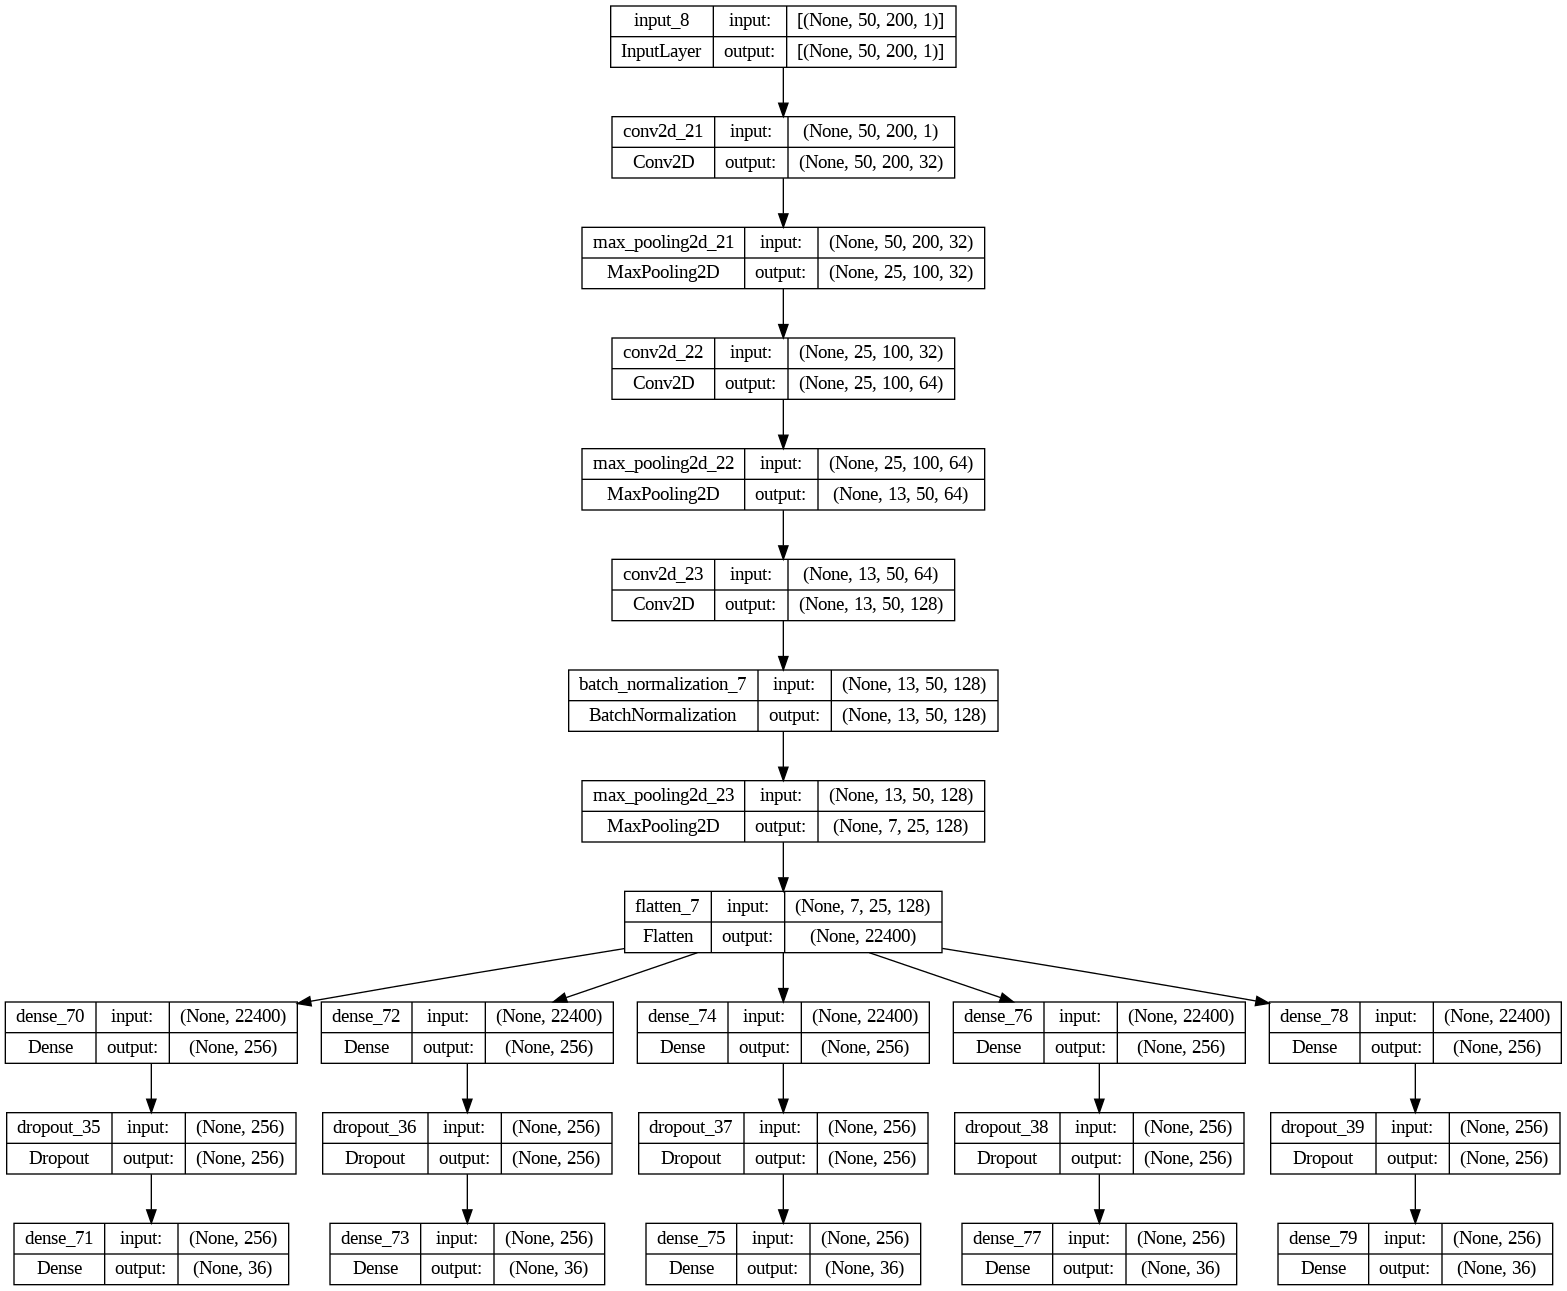

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)# will stop training, when there is no sustantial change coming

In [ ]:
# Train the model
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]],
                 batch_size=32, epochs=100, verbose=1,
                 validation_split=0.2,callbacks=[es])

Epoch 1/100
25/25 [==============================] - 35s 1s/step - loss: 20.6045 - dense_71_loss: 3.9589 - dense_73_loss: 3.9589 - dense_75_loss: 4.0086 - dense_77_loss: 4.2849 - dense_79_loss: 4.3932 - dense_71_accuracy: 0.0657 - dense_73_accuracy: 0.0631 - dense_75_accuracy: 0.0619 - dense_77_accuracy: 0.0619 - dense_79_accuracy: 0.0631 - val_loss: 17.8630 - val_dense_71_loss: 3.5771 - val_dense_73_loss: 3.6585 - val_dense_75_loss: 3.4996 - val_dense_77_loss: 3.6471 - val_dense_79_loss: 3.4808 - val_dense_71_accuracy: 0.0000e+00 - val_dense_73_accuracy: 0.0412 - val_dense_75_accuracy: 0.0309 - val_dense_77_accuracy: 0.0000e+00 - val_dense_79_accuracy: 0.0670
Epoch 2/100
25/25 [==============================] - 28s 1s/step - loss: 15.3924 - dense_71_loss: 3.0214 - dense_73_loss: 3.0895 - dense_75_loss: 3.1176 - dense_77_loss: 3.1035 - dense_79_loss: 3.0604 - dense_71_accuracy: 0.0954 - dense_73_accuracy: 0.1005 - dense_75_accuracy: 0.0954 - dense_77_accuracy: 0.0902 - dense_79_accurac

In [ ]:
# Evaluate the model on the test set
score = model.evaluate(X_test,[y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]], verbose=1)
print('Test loss and accuracy:', score)

4/4 [==============================] - 1s 176ms/step - loss: 1517.9170 - dense_71_loss: 339.3948 - dense_73_loss: 319.1636 - dense_75_loss: 351.3583 - dense_77_loss: 189.7589 - dense_79_loss: 318.2413 - dense_71_accuracy: 0.0727 - dense_73_accuracy: 0.0364 - dense_75_accuracy: 0.0727 - dense_77_accuracy: 0.0818 - dense_79_accuracy: 0.0727
Test loss and accuracy: [1517.9169921875, 339.3948059082031, 319.1636047363281, 351.35833740234375, 189.75889587402344, 318.24127197265625, 0.072727270424366, 0.036363635212183, 0.072727270424366, 0.08181817829608917, 0.072727270424366]
